In [1]:
import sys

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# add parent directory to import the module
sys.path.append('..')

In [3]:
# import model
from hansen_et_al_1981 import HansenEtAl1981

In [4]:
# load forcing data
historical_forcing_df = pd.read_csv('data/forcing/historical.csv')
ssps_forcing_df = pd.read_csv('data/forcing/ssps.csv')

In [5]:
# read observed temperature anomaly data
obs_df = pd.read_csv('data/anom_obs.csv')
obs_df = obs_df.set_index('YEAR')

In [6]:
# initialize the scaling factor for each forcing variable (column)
scaling_factor = { col:1.0 for col in historical_forcing_df.columns[1:-1] }

In [7]:
# convert YEAR column to datetime and set as index
historical_forcing_df['YEAR'] = historical_forcing_df['YEAR'].astype(int)
historical_forcing_df = historical_forcing_df.set_index('YEAR')

In [8]:
# extract SSP names and create a color map
ssp_names = sorted(list(ssps_forcing_df['SSP'].unique()))
ssp_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
ssp_color_map = dict(zip(ssp_names, ssp_colors))

In [9]:
# instantiate model
model = HansenEtAl1981()

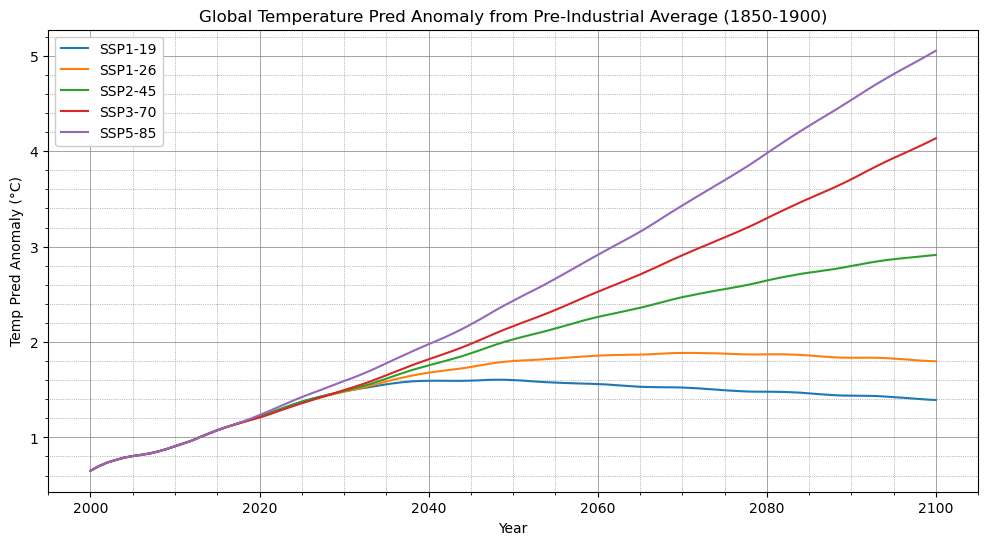

In [10]:
plt.figure(figsize=(12, 6))
for i, ssp in enumerate(ssp_names):
    # select data for the current SSP
    ssp_forcing_df = ssps_forcing_df[ssps_forcing_df['SSP'] == ssp]
    
    # initialize the model
    model.set_model_params(Tm=0.0, Td=0.0)

    # run the model
    results_df = model.run(historical_forcing_df, ssp_forcing_df, scaling_factor)
        
    # plot results
    plt.plot(results_df.loc[2000:].index, results_df.loc[2000:]['Pred Anom'], label=ssp, color=ssp_color_map[ssp])

plt.title('Global Temperature Pred Anomaly from Pre-Industrial Average (1850-1900)')
plt.xlabel('Year')
plt.ylabel('Temp Pred Anomaly (°C)')
plt.legend(framealpha=1)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.show()